## Linear Regression with Gradient Descent

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### Load the dataset

In [3]:
dataset = pd.read_csv('winequality-white.csv', sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Split the dataset into train and test

In [4]:
label = dataset['quality']
data = dataset.drop('quality', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
X_train
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4656,6.0,0.29,0.41,10.80,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667
3659,5.4,0.53,0.16,2.70,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000
907,7.1,0.25,0.39,2.10,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000
4352,7.3,0.28,0.35,1.60,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000
3271,6.5,0.32,0.34,5.70,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000
...,...,...,...,...,...,...,...,...,...,...,...
3207,6.8,0.21,0.42,1.20,0.045,24.0,126.0,0.99234,3.09,0.87,10.900000
1539,7.3,0.26,0.49,5.00,0.028,32.0,107.0,0.99360,3.24,0.54,10.800000
964,5.9,0.26,0.21,12.50,0.034,36.0,152.0,0.99720,3.28,0.43,9.500000
168,7.5,0.29,0.31,8.95,0.055,20.0,151.0,0.99680,3.08,0.54,9.300000


### Scale the data

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train the model

In [10]:
from sklearn.pipeline import make_pipeline
est = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
est.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

### Predict the test set

In [11]:
y_pred = est.predict(X_test)

### Evaluate the model with mean absolute error

In [16]:
from sklearn.metrics import mean_absolute_error
absolute_error = mean_absolute_error(y_test, y_pred)

### Evaluate the model with mean squared error

In [18]:
from sklearn.metrics import mean_squared_error
squared_error = mean_squared_error(y_test, y_pred)

### Plot the predicted values vs the actual values

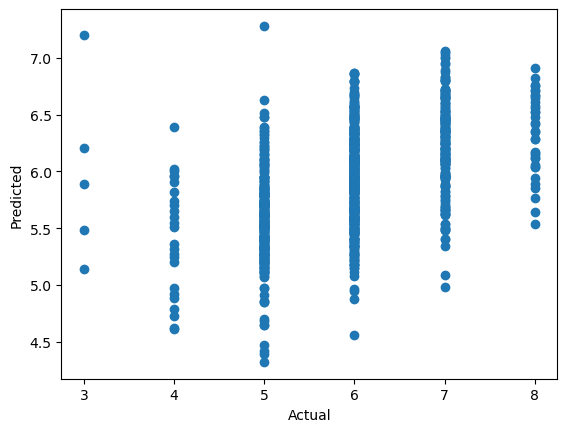

Mean Absolute Error: 0.5879698657935284
Mean Squared Error: 0.5727875182519324


In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
print('Mean Absolute Error:', absolute_error)
print('Mean Squared Error:', squared_error)